Лабораторная работа №3
Проверка статистических гипотез о виде закона распределения.
Вариант 10. Y = ln(x); a = 1; b = 5; y0 = 1

Задание 1. Доверительный интервал для математического ожидания СВ.

Импортируем необходимые библиотеки:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

n = 200 #задается вручную

# найдены в 1-й ЛР
a = 1.
b = 5.

# формируем выборку
def get_sample(n):
    sample_X = []
    sample_Y = []
    uniform_rv = sts.uniform()
    sample_xi = uniform_rv.rvs(size=n)

    for i in range(n):
        x = sample_xi[i] * (b - a) + a
        sample_X.append(x)
        y = np.log(x)
        sample_Y.append(y)
    return sample_Y

sample_Y = get_sample(n)

Первым шагом метода Пирсона построим гистограмму равновероятностным способом, а также теоретическую плотность:

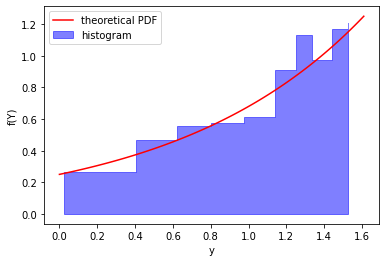

In [17]:
M = 10 # int(np.sqrt(n)) if n <= 100 else int(3 * np.log10(n)) # эмпирически определяем количество интервалов
m = n // M                                                # количество элементов в каждом интервале

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (A, B, d, x, y)

A, B, d, x, y = hist_eq_prob(sample_Y)
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")

xx = np.linspace(np.log(1), np.log(5), 100)
py = np.exp(xx) / 4
plt.plot(xx, py, label='theoretical PDF', c='r')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Видим, что гистограмма и плотность очень похожи. Выдвинем гипотезу H_0, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством χ^2 статистики. Пусть для определенности будем проверять для вероятности ошибки первого рода α = 0.01.

In [18]:
table = pd.DataFrame(data={"$A_i$" : A, "$B_i$": B, "$d_i$": d, "$v_i$": [m]*len(d), "$f_i$": y})
table

,$A_i$,$B_i$,$d_i$,$v_i$,$f_i$
0,0.026773,0.407027,0.380255,20,0.262982
1,0.407027,0.622227,0.215199,20,0.464685
2,0.622227,0.801860,0.179634,20,0.556689
3,0.801860,0.975198,0.173338,20,0.576907
4,0.975198,1.138531,0.163333,20,0.612246
5,1.138531,1.248390,0.109858,20,0.910263
6,1.248390,1.336894,0.088504,20,1.129893
7,1.336894,1.439512,0.102618,20,0.974486
8,1.439512,1.525093,0.085581,20,1.168481
9,1.525093,1.607940,0.082847,20,1.207051


In [19]:
p = []
p_ = [m / n] * len(A)
FB = []
FA = []

for i in range(len(A)):
    FB.append(np.exp(B[i]))
    FA.append(np.exp(A[i]))
    p.append(1./4. * (np.exp(B[i]) - np.exp(A[i])))

In [20]:
chi = []

for i in range(len(A)):
    chi.append(n * (p[i] - p_[i])**2 / p[i])
    
table2 = pd.DataFrame(data={"$F(A_i)$" : FA, "$F(B_i)$": FB, "$p_i$": p, "$p_i^*$": p_, "$\chi_i$": chi})
table2    

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,1.027134,1.502345,0.118803,0.1,0.595174
1,1.502345,1.863072,0.090182,0.1,0.213788
2,1.863072,2.229685,0.091653,0.1,0.152027
3,2.229685,2.651693,0.105502,0.1,0.057389
4,2.651693,3.122180,0.117622,0.1,0.528005
5,3.122180,3.484727,0.090637,0.1,0.193452
6,3.484727,3.807199,0.080618,0.1,0.931961
7,3.807199,4.218636,0.102859,0.1,0.015897
8,4.218636,4.595571,0.094234,0.1,0.070567
9,4.595571,4.992514,0.099236,0.1,0.001177


Найдем статистику χ^2:

In [21]:
chi_stat = sum(chi)
print(chi_stat)

2.7594371721823028


Найдем количество степеней свободы. Так как наше распределение не зависит ни от каких параметров, то количество степеней свободы будет равнятся: k = M - 1

In [22]:
k = M - 1
print(k)

9


Задание 2. В соответствии с вариантом (см. задание 1) сформировать выборку из 30 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Колмогорова.

In [23]:
n = 30
sample_Y2 = get_sample(n)

Построим вариационный ряд:

In [24]:
sample_Y2.sort()
table_row = pd.DataFrame(data={"Значение": sample_Y2})
table_row.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Значение,0.2174,0.275922,0.403439,0.467145,0.650947,0.652624,0.717529,0.785735,0.810704,0.811681,...,1.395106,1.398221,1.426915,1.452386,1.466652,1.488017,1.511972,1.56624,1.575729,1.590455


Построим графики теоретической и эмпирической функций распределения:

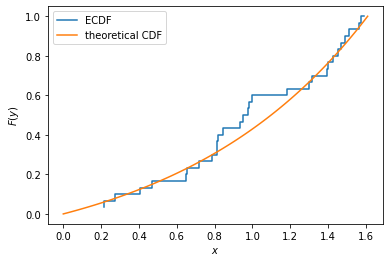

In [25]:
# для построения ECDF (эмпирическая функция распределения) используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample_Y2)
plt.step(ecdf.x, ecdf.y, label='ECDF')

xx = np.linspace(np.log(1), np.log(5), 100)
yy = (np.exp(xx) - 1) / 4
plt.plot(xx, yy, label='theoretical CDF')

plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

Видим, что гистограмма и плотность очень похожи. Выдвинем гипотезу H_0, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Колмогорова. Пусть для определенности будем проверять для вероятности ошибки первого рода α = 0.05.

In [26]:
def F(x):
    return (np.exp(x) - 1) / 4

dp = []
dm = []

for i in range(n - 1):
    dp.append(abs((i + 1) / n - F(sample_Y2[i])))
    dm.append(abs(i / n - F(sample_Y2[i])))
    
d = max(max(dm), max(dp))
print (d)

0.13800208464204444


In [27]:
l = d * np.sqrt(n)
print(l)

0.75586854741185


Задание 3. В соответствии с вариантом (см. задание 1) сформировать выборку из 50 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Мизеса.

In [28]:
n = 50
sample_Y3 = get_sample(n)
sample_Y3.sort()

Выдвинем гипотезу H_0, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Мизеса. Пусть для определенности будем проверять для вероятности ошибки первого рода α = 0.05.

In [29]:
Fny = []
F0y = []
delta = []

for i in range(n):
    Fny.append((i + 0.5) / n) # знак +, т.к. нумерация начинается с нуля
    F0y.append(F(sample_Y3[i]))
    delta.append((Fny[i] - F0y[i])**2)

table3 = pd.DataFrame(data={"$y$": sample_Y3, "$F_n$": Fny, "$F$": F0y, "$\delta$": delta})
table3

,$y$,$F_n$,$F$,$\delta$
0,0.003040,0.01,0.000761,8.535457e-05
1,0.019386,0.03,0.004894,6.303162e-04
2,0.136946,0.05,0.036692,1.771160e-04
3,0.172413,0.07,0.047042,5.270657e-04
4,0.231600,0.09,0.065154,6.173308e-04
5,0.368607,0.11,0.111430,2.044913e-06
6,0.379339,0.13,0.115330,2.152203e-04
7,0.417207,0.15,0.129429,4.231578e-04
8,0.461097,0.17,0.146453,5.544625e-04
9,0.494516,0.19,0.159926,9.044337e-04


In [30]:
stat3 = 1. / (4 * n) + sum(delta)
print(stat3)

0.09229084963142771
